In [1]:
import pandas as pd
import numpy as np
from transformers import pipeline

import matplotlib.pyplot as plt
import seaborn as sns
import ast

/home/ptyagi/miniconda3/envs/thesis_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
tweet_replies_predictions_feb_2019_en =pd.read_csv('/work/ptyagi/masterthesis/tmp/tweet_replies_predictions_feb_2019_en.csv')

In [4]:
tweet_replies_predictions_feb_2019_en.head()

,Unnamed: 0,id,conversation_id,created_at,replies,tweet_text,tweet_lang,lang_confidence,reply_emotion_roberta_base,emotion_confidence_roberta_base,reply_emotion_roberta_large,emotion_confidence_roberta_large,reply_emotion_bart,emotion_confidence_bart
0,0,1091717834860826624,1091717129995542528,2019-02-02 15:19:49+00:00,Go Trump!!,Energy Insider: Exploring the impact of winter...,en,0.742598,anger,0.962685,anger,0.972646,optimism,0.621922
1,1,1092776979567468546,1092776506106015746,2019-02-05 13:28:29+00:00,eat local and grow local the ecosystem is buil...,Given how what we eat (demand) determines what...,en,0.901509,optimism,0.983526,optimism,0.980633,anticipation,0.234829
2,2,1092835036037087232,1092784983998189568,2019-02-05 17:19:11+00:00,TUMP,New: [USER] PhD candidate Rodrigo Muñoz-Gonzál...,en,0.924515,anger,0.352324,joy,0.700554,pessimism,0.322435
3,3,1093139326496636928,1093132427810271233,2019-02-06 13:28:19+00:00,the sky is falling the sky in falling the corr...,See how Canada is addressing #ClimateChange th...,en,0.738337,optimism,0.838999,joy,0.954299,pessimism,0.411842
4,4,1094072089672175622,1094070997135822848,2019-02-09 03:14:47+00:00,you are beyond demented the utter presumptuous...,You can kiss your beer goodbye if climate chan...,en,0.934737,anger,0.985042,anger,0.993971,disgust,0.301617


In [18]:
emotion_classifier = pipeline("text-classification", model="cardiffnlp/twitter-roberta-base-emotion-latest", top_k=3, device=3)

In [19]:
emotion_predictions = emotion_classifier(tweet_replies_predictions_feb_2019_en['replies'].tolist(), batch_size=8)

In [21]:
emotion_predictions[0]

[{'label': 'anger', 'score': 0.9626848101615906},
 {'label': 'disgust', 'score': 0.860825777053833},
 {'label': 'joy', 'score': 0.23503410816192627}]

In [22]:
top_3 = [[tuple(item['label'] for item in sublist), tuple(item['score'] for item in sublist)] for sublist in emotion_predictions]

labels_col = [x[0] for x in top_3] 
scores_col = [x[1] for x in top_3]  

tweet_replies_predictions_feb_2019_en['top_3_labels_roberta_base'] = labels_col
tweet_replies_predictions_feb_2019_en['top_3_scores_roberta_base'] = scores_col

In [23]:
tweet_replies_predictions_feb_2019_en.head()

,Unnamed: 0,id,conversation_id,created_at,replies,tweet_text,tweet_lang,lang_confidence,reply_emotion_roberta_base,emotion_confidence_roberta_base,reply_emotion_roberta_large,emotion_confidence_roberta_large,reply_emotion_bart,emotion_confidence_bart,top_3_labels_roberta_base,top_3_scores_roberta_base
0,0,1091717834860826624,1091717129995542528,2019-02-02 15:19:49+00:00,Go Trump!!,Energy Insider: Exploring the impact of winter...,en,0.742598,anger,0.962685,anger,0.972646,optimism,0.621922,"(anger, disgust, joy)","(0.9626848101615906, 0.860825777053833, 0.2350..."
1,1,1092776979567468546,1092776506106015746,2019-02-05 13:28:29+00:00,eat local and grow local the ecosystem is buil...,Given how what we eat (demand) determines what...,en,0.901509,optimism,0.983526,optimism,0.980633,anticipation,0.234829,"(optimism, joy, trust)","(0.9835257530212402, 0.7558496594429016, 0.317..."
2,2,1092835036037087232,1092784983998189568,2019-02-05 17:19:11+00:00,TUMP,New: [USER] PhD candidate Rodrigo Muñoz-Gonzál...,en,0.924515,anger,0.352324,joy,0.700554,pessimism,0.322435,"(anger, disgust, anticipation)","(0.3523235321044922, 0.23993079364299774, 0.04..."
3,3,1093139326496636928,1093132427810271233,2019-02-06 13:28:19+00:00,the sky is falling the sky in falling the corr...,See how Canada is addressing #ClimateChange th...,en,0.738337,optimism,0.838999,joy,0.954299,pessimism,0.411842,"(optimism, joy, anger)","(0.8389987945556641, 0.58051598072052, 0.39537..."
4,4,1094072089672175622,1094070997135822848,2019-02-09 03:14:47+00:00,you are beyond demented the utter presumptuous...,You can kiss your beer goodbye if climate chan...,en,0.934737,anger,0.985042,anger,0.993971,disgust,0.301617,"(anger, disgust, sadness)","(0.9850420355796814, 0.9834210276603699, 0.399..."


In [24]:
emotion_classifier = pipeline("text-classification", model="cardiffnlp/twitter-roberta-large-emotion-latest", top_k=3, device=3)

In [25]:
emotion_predictions = emotion_classifier(tweet_replies_predictions_feb_2019_en['replies'].tolist(), batch_size=8)

In [26]:
emotion_predictions[0]

[{'label': 'anger', 'score': 0.9726458191871643},
 {'label': 'disgust', 'score': 0.8819092512130737},
 {'label': 'joy', 'score': 0.16582560539245605}]

In [27]:
top_3 = [[tuple(item['label'] for item in sublist), tuple(item['score'] for item in sublist)] for sublist in emotion_predictions]

labels_col = [x[0] for x in top_3] 
scores_col = [x[1] for x in top_3]  

tweet_replies_predictions_feb_2019_en['top_3_labels_roberta_large'] = labels_col
tweet_replies_predictions_feb_2019_en['top_3_scores_roberta_large'] = scores_col

In [28]:
tweet_replies_predictions_feb_2019_en.head()

,Unnamed: 0,id,conversation_id,created_at,replies,tweet_text,tweet_lang,lang_confidence,reply_emotion_roberta_base,emotion_confidence_roberta_base,reply_emotion_roberta_large,emotion_confidence_roberta_large,reply_emotion_bart,emotion_confidence_bart,top_3_labels_roberta_base,top_3_scores_roberta_base,top_3_labels_roberta_large,top_3_scores_roberta_large
0,0,1091717834860826624,1091717129995542528,2019-02-02 15:19:49+00:00,Go Trump!!,Energy Insider: Exploring the impact of winter...,en,0.742598,anger,0.962685,anger,0.972646,optimism,0.621922,"(anger, disgust, joy)","(0.9626848101615906, 0.860825777053833, 0.2350...","(anger, disgust, joy)","(0.9726458191871643, 0.8819092512130737, 0.165..."
1,1,1092776979567468546,1092776506106015746,2019-02-05 13:28:29+00:00,eat local and grow local the ecosystem is buil...,Given how what we eat (demand) determines what...,en,0.901509,optimism,0.983526,optimism,0.980633,anticipation,0.234829,"(optimism, joy, trust)","(0.9835257530212402, 0.7558496594429016, 0.317...","(optimism, joy, anticipation)","(0.9806329607963562, 0.7929828763008118, 0.226..."
2,2,1092835036037087232,1092784983998189568,2019-02-05 17:19:11+00:00,TUMP,New: [USER] PhD candidate Rodrigo Muñoz-Gonzál...,en,0.924515,anger,0.352324,joy,0.700554,pessimism,0.322435,"(anger, disgust, anticipation)","(0.3523235321044922, 0.23993079364299774, 0.04...","(joy, anticipation, anger)","(0.700554370880127, 0.14450152218341827, 0.116..."
3,3,1093139326496636928,1093132427810271233,2019-02-06 13:28:19+00:00,the sky is falling the sky in falling the corr...,See how Canada is addressing #ClimateChange th...,en,0.738337,optimism,0.838999,joy,0.954299,pessimism,0.411842,"(optimism, joy, anger)","(0.8389987945556641, 0.58051598072052, 0.39537...","(joy, anger, disgust)","(0.9542987942695618, 0.3874838948249817, 0.311..."
4,4,1094072089672175622,1094070997135822848,2019-02-09 03:14:47+00:00,you are beyond demented the utter presumptuous...,You can kiss your beer goodbye if climate chan...,en,0.934737,anger,0.985042,anger,0.993971,disgust,0.301617,"(anger, disgust, sadness)","(0.9850420355796814, 0.9834210276603699, 0.399...","(anger, disgust, sadness)","(0.9939709901809692, 0.9895362854003906, 0.089..."


In [31]:
bart_classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli", device=3)

/home/ptyagi/miniconda3/envs/thesis_env/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [46]:
classification_results = []
for i in range(0, len(tweet_replies_predictions_feb_2019_en), 32):
    batch = tweet_replies_predictions_feb_2019_en['replies'][i:i + 32].tolist()
    outputs = bart_classifier(batch,
        candidate_labels = ["anger", "anticipation", "disgust", "fear", "joy", "love", "optimism", "pessimism", "sadness", "surprise", "trust"],
        multi_label = True)
    classification_results.extend(outputs)


In [53]:
classification_results[0]

{'sequence': 'Go Trump!!',
 'labels': ['optimism',
  'joy',
  'surprise',
  'anticipation',
  'trust',
  'anger',
  'pessimism',
  'love',
  'fear',
  'disgust',
  'sadness'],
 'scores': [0.9860696196556091,
  0.9570428133010864,
  0.3528136610984802,
  0.2843059301376343,
  0.039263300597667694,
  0.00586162693798542,
  0.0001794684649212286,
  0.00017271097749471664,
  7.59223330533132e-05,
  5.2224953833501786e-05,
  3.389388439245522e-05]}

In [54]:
result = []
for entry in classification_results:
    sorted_items = sorted(zip(entry['labels'], entry['scores']), key=lambda x: x[1], reverse=True)
    
    top_labels = tuple(label for label, score in sorted_items[:3])
    top_scores = tuple(score for label, score in sorted_items[:3])
    
    result.append([top_labels, top_scores])

In [55]:
labels_col = [x[0] for x in result] 
scores_col = [x[1] for x in result]  

tweet_replies_predictions_feb_2019_en['top_3_labels_bart'] = labels_col
tweet_replies_predictions_feb_2019_en['top_3_scores_bart'] = scores_col

In [56]:
tweet_replies_predictions_feb_2019_en.to_csv('/work/ptyagi/masterthesis/tmp/multi_label_predictions_feb_2019_en.csv')

In [2]:
tweet_replies_predictions_feb_2019_en = pd.read_csv('/work/ptyagi/masterthesis/tmp/multi_label_predictions_feb_2019_en.csv')

In [5]:

deberta_classifier = pipeline("zero-shot-classification", model="MoritzLaurer/mDeBERTa-v3-base-xnli-multilingual-nli-2mil7", device=2)


/home/ptyagi/miniconda3/envs/thesis_env/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [12]:
def data():
    for value in tweet_replies_predictions_feb_2019_en['replies'].to_list():
        yield value

In [13]:
classification_results = []
for text in data():
    result = deberta_classifier(
    text,
    candidate_labels = ["anger", "anticipation", "disgust", "fear", "joy", "love", "optimism", "pessimism", "sadness", "surprise", "trust"],
    multi_label = True)
    classification_results.append(result)

In [14]:
classification_results[0]

{'sequence': 'Go Trump!!',
 'labels': ['anger',
  'pessimism',
  'anticipation',
  'trust',
  'surprise',
  'fear',
  'disgust',
  'optimism',
  'joy',
  'sadness',
  'love'],
 'scores': [0.9397512078285217,
  0.7404451966285706,
  0.6999909281730652,
  0.6845250725746155,
  0.4916597008705139,
  0.46804070472717285,
  0.44943153858184814,
  0.290373295545578,
  0.24916718900203705,
  0.12703531980514526,
  0.04056450352072716]}

In [15]:
result = []
for entry in classification_results:
    sorted_items = sorted(zip(entry['labels'], entry['scores']), key=lambda x: x[1], reverse=True)
    
    top_labels = tuple(label for label, score in sorted_items[:3])
    top_scores = tuple(score for label, score in sorted_items[:3])
    
    result.append([top_labels, top_scores])

In [16]:
labels_col = [x[0] for x in result] 
scores_col = [x[1] for x in result]  

tweet_replies_predictions_feb_2019_en['top_3_labels_deberta_xnli'] = labels_col
tweet_replies_predictions_feb_2019_en['top_3_scores_deberta_xnli'] = scores_col

In [17]:
tweet_replies_predictions_feb_2019_en

,Unnamed: 0.1,Unnamed: 0,id,conversation_id,created_at,replies,tweet_text,tweet_lang,lang_confidence,reply_emotion_roberta_base,...,reply_emotion_bart,emotion_confidence_bart,top_3_labels_roberta_base,top_3_scores_roberta_base,top_3_labels_roberta_large,top_3_scores_roberta_large,top_3_labels_bart,top_3_scores_bart,top_3_labels_deberta_xnli,top_3_scores_deberta_xnli
0,0,0,1091717834860826624,1091717129995542528,2019-02-02 15:19:49+00:00,Go Trump!!,Energy Insider: Exploring the impact of winter...,en,0.742598,anger,...,optimism,0.621922,"('anger', 'disgust', 'joy')","(0.9626848101615906, 0.860825777053833, 0.2350...","('anger', 'disgust', 'joy')","(0.9726458191871643, 0.8819092512130737, 0.165...","('optimism', 'joy', 'surprise')","(0.9860696196556091, 0.9570428133010864, 0.352...","(anger, pessimism, anticipation)","(0.9397512078285217, 0.7404451966285706, 0.699..."
1,1,1,1092776979567468546,1092776506106015746,2019-02-05 13:28:29+00:00,eat local and grow local the ecosystem is buil...,Given how what we eat (demand) determines what...,en,0.901509,optimism,...,anticipation,0.234829,"('optimism', 'joy', 'trust')","(0.9835257530212402, 0.7558496594429016, 0.317...","('optimism', 'joy', 'anticipation')","(0.9806329607963562, 0.7929828763008118, 0.226...","('optimism', 'trust', 'joy')","(0.37900763750076294, 0.13457684218883514, 0.1...","(optimism, anticipation, trust)","(0.9980084896087646, 0.9324053525924683, 0.635..."
2,2,2,1092835036037087232,1092784983998189568,2019-02-05 17:19:11+00:00,TUMP,New: [USER] PhD candidate Rodrigo Muñoz-Gonzál...,en,0.924515,anger,...,pessimism,0.322435,"('anger', 'disgust', 'anticipation')","(0.3523235321044922, 0.23993079364299774, 0.04...","('joy', 'anticipation', 'anger')","(0.700554370880127, 0.14450152218341827, 0.116...","('pessimism', 'surprise', 'anger')","(0.7269492745399475, 0.23788031935691833, 0.19...","(anticipation, sadness, pessimism)","(0.8244761228561401, 0.8120061755180359, 0.761..."
3,3,3,1093139326496636928,1093132427810271233,2019-02-06 13:28:19+00:00,the sky is falling the sky in falling the corr...,See how Canada is addressing #ClimateChange th...,en,0.738337,optimism,...,pessimism,0.411842,"('optimism', 'joy', 'anger')","(0.8389987945556641, 0.58051598072052, 0.39537...","('joy', 'anger', 'disgust')","(0.9542987942695618, 0.3874838948249817, 0.311...","('pessimism', 'fear', 'disgust')","(0.9699257016181946, 0.7580270171165466, 0.584...","(anticipation, anger, pessimism)","(0.990196704864502, 0.9716505408287048, 0.9461..."
4,4,4,1094072089672175622,1094070997135822848,2019-02-09 03:14:47+00:00,you are beyond demented the utter presumptuous...,You can kiss your beer goodbye if climate chan...,en,0.934737,anger,...,disgust,0.301617,"('anger', 'disgust', 'sadness')","(0.9850420355796814, 0.9834210276603699, 0.399...","('anger', 'disgust', 'sadness')","(0.9939709901809692, 0.9895362854003906, 0.089...","('disgust', 'pessimism', 'anger')","(0.9831241369247437, 0.9732086658477783, 0.950...","(disgust, sadness, anger)","(0.9992107152938843, 0.9980917572975159, 0.989..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12611,12611,12611,1101270343597998080,1101215748305944576,2019-02-28 23:58:05+00:00,i do not see them moving over is there a repub...,"For an embarrassingly long time, Dems used “sc...",en,0.895219,anticipation,...,surprise,0.520580,"('anticipation', 'disgust', 'surprise')","(0.6367928385734558, 0.25939100980758667, 0.18...","('anticipation', 'disgust', 'surprise')","(0.5433971285820007, 0.46782034635543823, 0.32...","('surprise', 'pessimism', 'trust')","(0.987078070640564, 0.9484825730323792, 0.6509...","(pessimism, sadness, anticipation)","(0.7139500975608826, 0.6268747448921204, 0.526..."
12612,12612,12612,1101270588180582402,1101265867353018368,2019-02-28 23:59:03+00:00,shriver unaware we are already importing much ...,Time for some climate change chat #bbcqt [URL],en,0.568811,disgust,...,surprise,0.615138,"('disgust', 'anger'

In [18]:
tweet_replies_predictions_feb_2019_en.to_csv('/work/ptyagi/masterthesis/tmp/multi_label_predictions_feb_2019_en.csv')

In [2]:
tweet_replies_predictions_feb_2019_en = pd.read_csv('/work/ptyagi/masterthesis/tmp/multi_label_predictions_feb_2019_en.csv')

In [3]:

zeroshot_classifier = pipeline("zero-shot-classification", model="MoritzLaurer/deberta-v3-large-zeroshot-v2.0", device=3)


In [4]:
def data():
    for value in tweet_replies_predictions_feb_2019_en['replies'].to_list():
        yield value

In [5]:
classification_results = []
for text in data():
    result = zeroshot_classifier(
    text,
    candidate_labels = ["anger", "anticipation", "disgust", "fear", "joy", "love", "optimism", "pessimism", "sadness", "surprise", "trust"],
    multi_label = True)
    classification_results.append(result)

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


In [6]:
classification_results[0]

{'sequence': 'Go Trump!!',
 'labels': ['optimism',
  'joy',
  'love',
  'anger',
  'surprise',
  'anticipation',
  'trust',
  'pessimism',
  'disgust',
  'fear',
  'sadness'],
 'scores': [0.9535680413246155,
  0.8632389307022095,
  0.027966417372226715,
  0.012172751128673553,
  0.010965797118842602,
  0.007540453691035509,
  0.0038863741792738438,
  0.00013630012108478695,
  0.00011672830441966653,
  0.0001071400911314413,
  7.846029620850459e-05]}

In [7]:
result = []
for entry in classification_results:
    sorted_items = sorted(zip(entry['labels'], entry['scores']), key=lambda x: x[1], reverse=True)
    
    top_labels = tuple(label for label, score in sorted_items[:3])
    top_scores = tuple(score for label, score in sorted_items[:3])
    
    result.append([top_labels, top_scores])

In [8]:
labels_col = [x[0] for x in result] 
scores_col = [x[1] for x in result]  

tweet_replies_predictions_feb_2019_en['top_3_labels_deberta_zero'] = labels_col
tweet_replies_predictions_feb_2019_en['top_3_scores_deberta_zero'] = scores_col

In [9]:
tweet_replies_predictions_feb_2019_en

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id,conversation_id,created_at,replies,tweet_text,tweet_lang,lang_confidence,...,top_3_labels_roberta_base,top_3_scores_roberta_base,top_3_labels_roberta_large,top_3_scores_roberta_large,top_3_labels_bart,top_3_scores_bart,top_3_labels_deberta_xnli,top_3_scores_deberta_xnli,top_3_labels_deberta_zero,top_3_scores_deberta_zero
0,0,0,0,1091717834860826624,1091717129995542528,2019-02-02 15:19:49+00:00,Go Trump!!,Energy Insider: Exploring the impact of winter...,en,0.742598,...,"('anger', 'disgust', 'joy')","(0.9626848101615906, 0.860825777053833, 0.2350...","('anger', 'disgust', 'joy')","(0.9726458191871643, 0.8819092512130737, 0.165...","('optimism', 'joy', 'surprise')","(0.9860696196556091, 0.9570428133010864, 0.352...","('anger', 'pessimism', 'anticipation')","(0.9397512078285217, 0.7404451966285706, 0.699...","(optimism, joy, love)","(0.9535680413246155, 0.8632389307022095, 0.027..."
1,1,1,1,1092776979567468546,1092776506106015746,2019-02-05 13:28:29+00:00,eat local and grow local the ecosystem is buil...,Given how what we eat (demand) determines what...,en,0.901509,...,"('optimism', 'joy', 'trust')","(0.9835257530212402, 0.7558496594429016, 0.317...","('optimism', 'joy', 'anticipation')","(0.9806329607963562, 0.7929828763008118, 0.226...","('optimism', 'trust', 'joy')","(0.37900763750076294, 0.13457684218883514, 0.1...","('optimism', 'anticipation', 'trust')","(0.9980084896087646, 0.9324053525924683, 0.635...","(optimism, anticipation, joy)","(0.7586331963539124, 0.029885094612836838, 0.0..."
2,2,2,2,1092835036037087232,1092784983998189568,2019-02-05 17:19:11+00:00,TUMP,New: [USER] PhD candidate Rodrigo Muñoz-Gonzál...,en,0.924515,...,"('anger', 'disgust', 'anticipation')","(0.3523235321044922, 0.23993079364299774, 0.04...","('joy', 'anticipation', 'anger')","(0.700554370880127, 0.14450152218341827, 0.116...","('pessimism', 'surprise', 'anger')","(0.7269492745399475, 0.23788031935691833, 0.19...","('anticipation', 'sadness', 'pessimism')","(0.8244761228561401, 0.8120061755180359, 0.761...","(surprise, sadness, pessimism)","(0.9842405915260315, 0.947125256061554, 0.9407..."
3,3,3,3,1093139326496636928,1093132427810271233,2019-02-06 13:28:19+00:00,the sky is falling the sky in falling the corr...,See how Canada is addressing #ClimateChange th...,en,0.738337,...,"('optimism', 'joy', 'anger')","(0.8389987945556641, 0.58051598072052, 0.39537...","('joy', 'anger', 'disgust')","(0.9542987942695618, 0.3874838948249817, 0.311...","('pessimism', 'fear', 'disgust')","(0.9699257016181946, 0.7580270171165466, 0.584...","('anticipation', 'anger', 'pessimism')","(0.990196704864502, 0.9716505408287048, 0.9461...","(pessimism, joy, anticipation)","(0.9711204767227173, 0.44248026609420776, 0.25..."
4,4,4,4,1094072089672175622,1094070997135822848,2019-02-09 03:14:47+00:00,you are beyond demented the utter presumptuous...,You can kiss your beer goodbye if climate chan...,en,0.934737,...,"('anger', 'disgust', 'sadness')","(0.9850420355796814, 0.9834210276603699, 0.399...","('anger', 'disgust', 'sadness')","(0.9939709901809692, 0.9895362854003906, 0.089...","('disgust', 'pessimism', 'anger')","(0.9831241369247437, 0.9732086658477783, 0.950...","('disgust', 'sadness', 'anger')","(0.9992107152938843, 0.9980917572975159, 0.989...","(anger, disgust, pessimism)","(0.9984543323516846, 0.9859429597854614, 0.079..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12611,12611,12611,12611,1101270343597998080,1101215748305944576,2019-02-28 23:58:05+00:00,i do not see them moving over is there a repub...,"For an embarrassingly long time, Dems used “sc...",en,0.895219,...,"('anticipation', 'disgust', 'surprise')","(0.6367928385734558, 0.25939100980758667, 0.18...","('anticipation', 'disgust', 'surprise')","(0.5433971285820007, 0.46782034635543823, 0.32...","('surprise', 'pessimism', 'trust')","(0.987078070640564, 0.9484825730323792, 0.6509...","('pessimism', 'sadness', 'anticipation')

In [10]:
tweet_replies_predictions_feb_2019_en.to_csv('/work/ptyagi/masterthesis/tmp/multi_label_predictions_feb_2019_en.csv')

In [11]:
annotated_df = pd.read_csv('/work/ptyagi/masterthesis/tmp/annotation.csv')

In [12]:
merged_df = pd.merge(annotated_df[['id','manual_label']], tweet_replies_predictions_feb_2019_en, on='id', how='left')

In [13]:
merged_df.drop(columns=['Unnamed: 0'], inplace=True)

In [14]:
merged_df.dropna(subset='manual_label', inplace=True)

In [15]:
tuple_columns = ['top_3_labels_roberta_base', 'top_3_labels_roberta_large', 'top_3_labels_bart', 'top_3_labels_deberta_xnli']

for col in tuple_columns:
    merged_df[col] = merged_df[col].apply(ast.literal_eval)

In [16]:
merged_df

,id,manual_label,Unnamed: 0.2,Unnamed: 0.1,conversation_id,created_at,replies,tweet_text,tweet_lang,lang_confidence,...,top_3_labels_roberta_base,top_3_scores_roberta_base,top_3_labels_roberta_large,top_3_scores_roberta_large,top_3_labels_bart,top_3_scores_bart,top_3_labels_deberta_xnli,top_3_scores_deberta_xnli,top_3_labels_deberta_zero,top_3_scores_deberta_zero
0,1099142075642068992,anger,7066,7066,1099140102616465409,2019-02-23 03:01:06+00:00,the adults putting her and the kids in this sp...,Sen. Dianne Feinstein clashed with children ov...,en,0.907013,...,"(anger, disgust, sadness)","(0.9836757779121399, 0.9745760560035706, 0.587...","(anger, disgust, optimism)","(0.9955814480781555, 0.9739786386489868, 0.073...","(surprise, anger, pessimism)","(0.6964385509490967, 0.6290321946144104, 0.568...","(disgust, anger, sadness)","(0.8640115261077881, 0.8347811102867126, 0.538...","(anger, disgust, pessimism)","(0.8989896178245544, 0.7550731897354126, 0.585..."
1,1096515259806949378,sadness,1135,1135,1096476267866742786,2019-02-15 21:03:04+00:00,it is known to depress iq in those poisoned by it,London's finest have started arresting childre...,en,0.873381,...,"(sadness, pessimism, disgust)","(0.9727621078491211, 0.6926121711730957, 0.321...","(sadness, disgust, pessimism)","(0.9126311540603638, 0.8042817711830139, 0.495...","(pessimism, surprise, sadness)","(0.8416218161582947, 0.6525675058364868, 0.645...","(sadness, pessimism, disgust)","(0.998650312423706, 0.9984588623046875, 0.9829...","(sadness, pessimism, disgust)","(0.9077954292297363, 0.6509696245193481, 0.351..."
2,1100372212794699782,anger,10374,10374,1100154569663733760,2019-02-26 12:29:14+00:00,i think almost everyone has woken up to the fa...,"In new Pew Poll, climate change falls to the b...",en,0.876844,...,"(anger, disgust, sadness)","(0.9900164008140564, 0.9838374257087708, 0.419...","(anger, disgust, sadness)","(0.9928029179573059, 0.9910215735435486, 0.154...","(pessimism, disgust, trust)","(0.8058627843856812, 0.6137633323669434, 0.228...","(disgust, anger, sadness)","(0.996616005897522, 0.9013699889183044, 0.8693...","(disgust, pessimism, anger)","(0.9593385457992554, 0.9299222230911255, 0.423..."
3,1099110064735047681,disgust,6969,6969,1099095683045429250,2019-02-23 00:53:54+00:00,no carbon taxes in purgatory,hmm i thought i supported doing whatever it ta...,en,0.975051,...,"(disgust, anger, sadness)","(0.8757981061935425, 0.8414299488067627, 0.174...","(sadness, disgust, anger)","(0.653516948223114, 0.5275007486343384, 0.2727...","(pessimism, surprise, disgust)","(0.9743093252182007, 0.6613330841064453, 0.607...","(anticipation, optimism, sadness)","(0.7585768103599548, 0.6599399447441101, 0.645...","(surprise, pessimism, anticipation)","(0.2936857342720032, 0.1840580552816391, 0.055..."
4,1098006647228706816,disgust,4210,4210,1097698843997552641,2019-02-19 23:49:19+00:00,god i thought our opposition in was bad how mu...,"I accept the science of climate change, so doe...",en,0.877320,...,"(anger, disgust, sadness)","(0.9882153272628784, 0.9862287044525146, 0.357...","(disgust, anger, sadness)","(0.9961180686950684, 0.9897410869598389, 0.154...","(surprise, pessimism, disgust)","(0.973896861076355, 0.951356828212738, 0.95113...","(pessimism, anticipation, disgust)","(0.9972473382949829, 0.9689959287643433, 0.965...","(anger, disgust, pessimism)","(0.9985408782958984, 0.9961930513381958, 0.826..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,1098912356917223430,joy,6641,6641,1098897664366862336,2019-02-22 11:48:17+00:00,wonderful speech,If you missed my speech at #Synod on Climate C...,en,0.854303,...,"(joy, optimism, love)","(0.9948058724403381, 0.7522202134132385, 0.395...","(joy, optimism, love)","(0.9978109002113342, 0.8173527121543884, 0.651...","(optimism, joy, trust)","(0.8642613291740417, 0.8174422383308411, 0.435...","(optimism, joy, anticipation)","(0.8463584780693054, 0.6568244099617004, 0.650...","(joy

In [23]:
def exact_match(row, col):
    return row['manual_label'] == row[col][0] 

def top_k_accuracy(row, col, k=3):
    return row['manual_label'] in row[col][:k]

def ranked_score(row, col):
    try:
        rank = row[col].index(row['manual_label']) + 1
        return 1 / rank  
    except ValueError:
        return 0 
def ndcg_k(row, col, k=3):
    top_k_preds = row[col][:k]
    dcg = 0
    for i, pred in enumerate(top_k_preds):
        if pred == row['manual_label']:
            dcg += 1 / np.log2(i + 2)  
    idcg = 1  
    return dcg / idcg


for model in ['top_3_labels_roberta_base', 'top_3_labels_roberta_large', 'top_3_labels_bart', 'top_3_labels_deberta_xnli', 'top_3_labels_deberta_zero']:
    merged_df[f'{model}_Exact_Match'] = merged_df.apply(exact_match, col=model, axis=1)
    merged_df[f'{model}_Top3_Accuracy'] = merged_df.apply(top_k_accuracy, col=model, axis=1)
    merged_df[f'{model}_Ranked_Score'] = merged_df.apply(ranked_score, col=model, axis=1)
    merged_df[f'{model}_NDCG@3'] = merged_df.apply(ndcg_k, col=model, axis=1)

exact_match_avg = merged_df[[f'{model}_Exact_Match' for model in ['top_3_labels_roberta_base', 'top_3_labels_roberta_large', 'top_3_labels_bart', 'top_3_labels_deberta_xnli', 'top_3_labels_deberta_zero']]].mean()
top3_accuracy_avg = merged_df[[f'{model}_Top3_Accuracy' for model in ['top_3_labels_roberta_base', 'top_3_labels_roberta_large', 'top_3_labels_bart', 'top_3_labels_deberta_xnli', 'top_3_labels_deberta_zero']]].mean()
ranked_score_avg = merged_df[[f'{model}_Ranked_Score' for model in ['top_3_labels_roberta_base', 'top_3_labels_roberta_large', 'top_3_labels_bart', 'top_3_labels_deberta_xnli', 'top_3_labels_deberta_zero']]].mean()
ndcg_avg = merged_df[[f'{model}_NDCG@3' for model in ['top_3_labels_roberta_base', 'top_3_labels_roberta_large', 'top_3_labels_bart', 'top_3_labels_deberta_xnli', 'top_3_labels_deberta_zero']]].mean()

results = pd.DataFrame({
    'Metric': ['Exact Match', 'Top 3 Accuracy', 'Ranked Score', 'NDCG@3'],
    'Roberta_base': [exact_match_avg.iloc[0], top3_accuracy_avg.iloc[0], ranked_score_avg.iloc[0], ndcg_avg.iloc[0]],
    'Roberta_large': [exact_match_avg.iloc[1], top3_accuracy_avg.iloc[1], ranked_score_avg.iloc[1], ndcg_avg.iloc[1]],
    'BART': [exact_match_avg.iloc[2], top3_accuracy_avg.iloc[2], ranked_score_avg.iloc[2], ndcg_avg.iloc[2]],
    'deberta_base_nli': [exact_match_avg.iloc[3], top3_accuracy_avg.iloc[3], ranked_score_avg.iloc[3], ndcg_avg.iloc[3]],
    'deberta_large_zeroshot': [exact_match_avg.iloc[4], top3_accuracy_avg.iloc[4], ranked_score_avg.iloc[4], ndcg_avg.iloc[4]]
})


In [35]:
results.to_csv('/work/ptyagi/masterthesis/tmp/model_comp.csv')
results

,Metric,Roberta_base,Roberta_large,BART,deberta_base_nli,deberta_large_zeroshot
0,Exact Match,0.629630,0.659259,0.251852,0.207407,0.466667
1,Top 3 Accuracy,0.844444,0.859259,0.600000,0.562963,0.822222
2,Ranked Score,0.724691,0.749383,0.397531,0.361728,0.624691
3,NDCG@3,0.755464,0.777686,0.449202,0.413311,0.675480


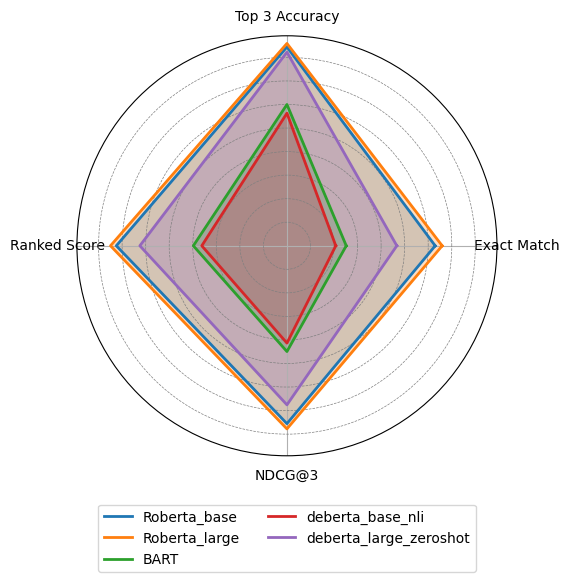

In [34]:
labels = results['Metric'].tolist()
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Extend colors to accommodate 5 models
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

for i, model in enumerate(results.columns[1:]):
    values = results[model].tolist()
    values += values[:1] 
    ax.fill(angles, values, color=colors[i], alpha=0.25)
    ax.plot(angles, values, linewidth=2, label=model, color=colors[i])

ax.set_yticklabels([])

# Rotate the labels and adjust the alignment
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=10, rotation=45, ha='center')

# Move the legend outside the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=True, fontsize='medium', ncol=2)

# Adjust the margins and spacing (extra space on the right)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)

# Add grid lines
ax.yaxis.grid(color='gray', linestyle='--', linewidth=0.5)

plt.show()


